### State-Space Models and Kalman Filter

state-space model과 ARIMA model간 관계를 논하고 Kalman filter에 대해 이해한다

#### 1. Local Trend Model

단변량 시계열 $y_t$가 아래의 식을 만족한다고 가정하자

$$y_t = \mu_t + e_t, ~~~~~ e_t \sim N(0, \sigma_e^2)$$
$$\mu_{t+1} = \mu_t + \eta_t, ~~~~~ \eta_t \sim N(0, \sigma_\eta^2)$$

여기서 $\{e_t\}$와 $\{\eta_t\}$는 각각 Gaussian white noise series이고, t는 시간에 대한 sequential series이다. 최초의 값 $\mu_1$이 알려져 있거나 분포가 주어져 있고, 각각 시점에 대해 오차항 $\{e_t\}$와 $\{\eta_t\}$는 독립적이다. 여기서 $\mu_t$는 *pure random walk*이고, $y_t$는 $\mu_t$에서 오차항 $e_t$가 추가된 관측된 시계열이다. 종합적으로 미루어 볼 때, $\mu_t$는 즉각적으로 관측이 되지 않는 trend이고, $y_t$는 오차항을 포함한 관측되는 데이터이다

위 모형을 linear Gaussian state-space model이라고 하고, $\mu_t$는 state이라고 한다. $y_t$와 state $\mu_t$를 측정오차 $e_t$를 포함한 observation error라고 한다. 또한 이 모형은 local-level model이라고도 불리며, 이는 구조적 시계열 모형의 예 중 하나이다

**$\mathrm{ARIMA}$ 모형과의 관계**

$\mathrm{ARIMA(0,1,1)}$ 모형을 만족하는 $y_t$가 아래와 같은 모형을 만족한다고 하자

$$(1-B)y_t = (1-\theta B)a_t$$

여기서 $\{a_t\}$는 평균이 0, 분산이 $\sigma_a^2$인 Gaussian white noise이다. value $\theta$와 $\sigma_a$는 $\sigma_e, \sigma_\eta$에 의해 결정된다. 최종적으로 다음과 같은 식을 얻을 수 있다

$$(1-B)\mu_{t+1} = \eta_t,~~~~~ \mu_{t+1} = \frac{1}{1-B}\eta_t$$

위 식을 이용해, 맨 위의 식 $y_t$를 다시쓰면

$$y_t = \frac{1}{1-B}\eta_{t-1} + e_t$$
$$(1-B)y_t = \eta_{t-1} + e_t - e_{t-1}$$

$(1-B)y_t = w_t$라고 하면 $w_t = \eta_{t-1} + e_t - e_{t-1}$이다. 가정에 의해 $w_t$는 gaussian이고, 분산은 $\mathrm{Var}(w_t) = 2\sigma_e^2 + \sigma_eta^2$이다. $\mathrm{Cov}(w_t, w_{t-1}) = -\sigma_e^2$이고 $j > 1$에서 $\mathrm{Cov}(w_t, w_{t-1}) = 0$이다. 결과적으로 $w_t$에서 $w_t = (1-\theta B)a_t$처럼 $\mathrm{MA}(1)$모형으로 표현 가능하다

**1.1 Statistical Inference**

Kalman Filtering에서 세 가지의 과정이 존재한다

- Filtering : 필터링은 정보의 수준 $F_t$가 있다고 가정할 때, 오차가 없는 state variable $\mu_t$를 추정하는 과정이다
- Prediction : 예측은 정보의 수준 $F_t$가 주어져 있다고 가정할 때, $h > 0$에서 $\mu_{t+h}$ 혹은 $y_{t+h}$을 예측하는 것을 의미한다
- Smoothing : 평활화(Smoothing)는 정보의 수준 $F_T$가 주어져 있다고 가정할 때, $\mu_t$를 주정하는 것이다. $(T>t)$ 즉, 과거의 값들을 매끄럽게 해주는 과정이라 생각하면 좋다

관측가능한 시계열 $y$가 존재하고 t시점에서의 정보집합 $F_{t-1}$가 있을 때, t시점의 값은 다음과 같이 표현 가능하다

$$y_{t|t-1} = E(y_t | F_{t-1}) = E(\mu_{t} + e_t | F_{t-1}) = E(\mu_t | F_{t-1}) = \mu_{t|t-1}$$

$v_t$를 아래와 같이 가정하자

$$v_t = y_t - y_{t|t-1} = y_t - \mu_{t|t-1}$$

$v_t$의 평균과 분산은 다음과 같이 계산 가능하다

$$E(v_t) = E[E(v_t | F_{t-1})] = E[E(y_t - y_{t|t-1} | F_{t-1})] = E[y_{t|t-1} - y_{t|t-1}] = 0$$
$$\mathrm{Var}(v_t) = \mathrm{Var}(y_t - \mu_{t|t-1}|F_{t-1}) = \Sigma_{t|t-1} + \sigma_e^2$$

마찬가지로 공분산은 다음과 같이 0으로 유도되는 것을 알 수 있다

$$\mathrm{Cov}(v_t, y_j) = E(v_t y_j) = E[E(v_t y_j|F_{t-1})] = E[y_j E(v_t|F_{t-1})] = 0, ~~~~~ j<t$$

**1.2 Local Linear Trend Model**

관측가능한 시계열 $y$가 있을 때, Local Linear Trend 모형을 다음과 같이 가정할 수 있다

$$y_t = \mu_t + \epsilon_t, ~~~~~ \epsilon_t \sim N(0, \sigma_\epsilon^2)$$
$$\mu_{t+1} = \mu_t + \nu_t + \eta_t, ~~~~~ \eta_t \sim N(0,\sigma_\eta^2)$$
$$\nu_{t+1} = \nu_t + \varsigma_t, ~~~~~ \varsigma \sim N(0, \sigma_{\varsigma}^2)$$
$$\alpha_1 \sim N(a_1, P_1)$$

- 만약 $\sigma_eta^2 = \sigma_\varsigma^2 = 0, \nu_{t+1} = \nu_t$이면 $\mu_{t+1} = \mu_t + \nu_t$이다. 따라서, 모든 t에 대해 $\nu_{t+1} = \nu_t = \dots = \nu_1$이고 $\mu_{t+1} = \mu_t + \nu_1 = \mu_1 + t \nu_1$이다. 결과적으로 모형은 **deterministic linear trend**와 **noise**가 더해진 모형으로 표현된다
- 만약 $\sigma_\eta^2$이고 $\sigma_\varsigma^2 > 0$이면, $\nu_{t+1}$는 random walk이고 $\mu_{t+1}$은 random walk의 합이다. 결과적으로 모형은 **integrated random walk** 모형으로 표현된다
- 만약 $\sigma_\eta^2 ? 0$이고 $\sigma_\varsigma^2 =0$이면, $\mu_{t+1} = \mu_t + \nu_1 + \eta_t$이다. 모형은 결과적으로 **deterministic linear trend**와 **random walk**가 결합된 모형으로 표현될 수 있다

**Advantages of the state space approach**

시계열을 구성하는 서로 다른 성분(예: 추세, 계절, 사이클 및 달력 변화, 설명 변수 및 개입)은 상태 공간 모델에서 함께 구성되기 전에 별도로 모델링된다. 따라서 State space model을 사용하여 각 성분을 별도로 식별할 수 있다. 그러나, 추정에 있어서 outlier가 굉장히 심할 수 있다

#### example 1

$\mathrm{ARIMA}$ 모형은 State Space 모형의 일종으로 생각될 수 있다

In [1]:
import datetime
import pandas_datareader as pdr

start_date = datetime.datetime(2020, 1, 1)
end_date = datetime.datetime(2023, 8, 31)

kospi = pdr.DataReader("KOSPI", "naver", start_date, end_date).astype(float).Close

<Axes: title={'center': 'KOSPI time series'}, xlabel='Date'>

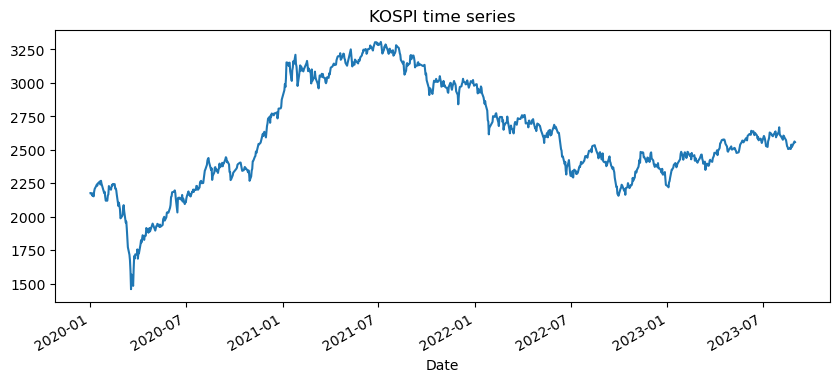

In [2]:
kospi.plot(grid = False, figsize = (10, 4), title = 'KOSPI time series')

ARIMA 모형 추정을 위해 ACF와 PACF값을 살펴보자

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")

In [4]:
ret = np.log(kospi) - np.log(kospi.shift())
ret = ret.dropna()

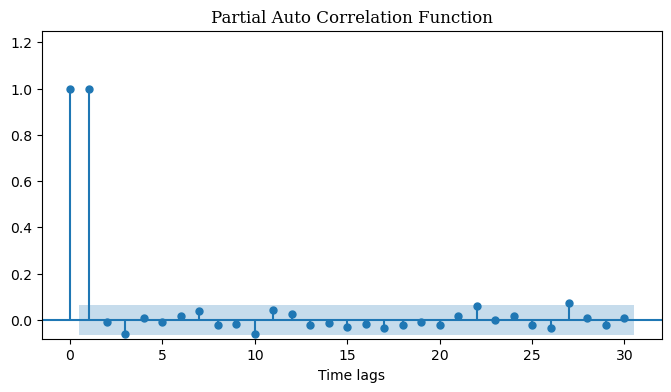

In [5]:
fig, ax = plt.subplots(figsize=(8, 4))
plot_pacf(kospi, auto_ylims = True, lags = 30, title = 'PACF of Tesla log Index', ax = ax)
plt.grid(False)
plt.xlabel('Time lags', fontsize = 10)
plt.title('Partial Auto Correlation Function', fontsize = 12, fontfamily = 'Serif')
plt.show()

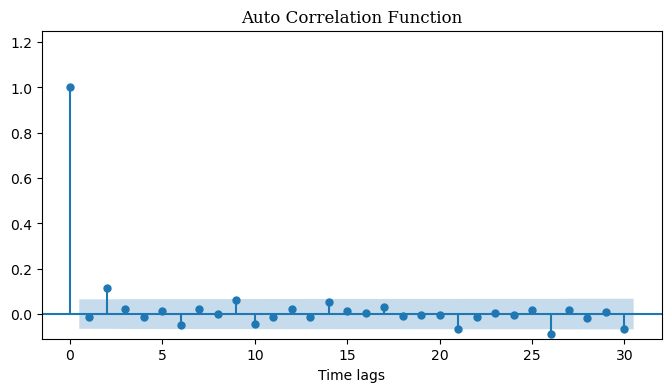

In [6]:
fig, ax = plt.subplots(figsize=(8, 4))
plot_acf(ret, auto_ylims = True, lags = 30, title = 'ACF of Tesla return' , ax = ax)
plt.grid(False)
plt.xlabel('Time lags', fontsize = 10)
plt.title('Auto Correlation Function', fontsize = 12, fontfamily = 'Serif')
plt.show()

$\mathrm{ARIMA}(1,0,2)$ 모형을 추정해 보도록 한다

In [7]:
import statsmodels.api as sm
model = sm.tsa.ARIMA(kospi, order = (1,0,2), trend = 'c').fit(method = 'innovations_mle')
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  908
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -4383.452
Date:                Thu, 28 Sep 2023   AIC                           8776.903
Time:                        01:10:00   BIC                           8800.959
Sample:                             0   HQIC                          8786.089
                                - 908                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2513.8554    234.064     10.740      0.000    2055.097    2972.613
ar.L1          0.9961      0.002    431.477      0.000       0.992       1.001
ma.L1          0.0096      0.023      0.414      0.6

Text(0.5, 1.0, 'Original Series versus ARMA models')

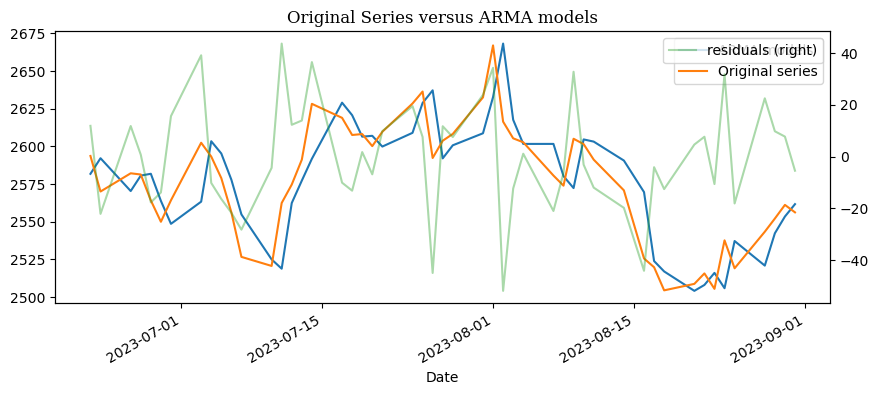

In [8]:
model.fittedvalues[-50:].plot(figsize = (10, 4), label = 'ARMA models')
kospi[-50:].plot(label = 'Original series')
plt.legend()
plt.grid(False)
model.resid[-50:].plot(label = 'residuals', secondary_y = True, alpha = 0.4)
plt.grid(False)
plt.legend()
plt.title('Original Series versus ARMA models', fontsize = 12, fontfamily = 'Serif')

fittedvalues를 통해 주어진 값은 관측되지 않은 공간으로써 생각할 수 있고, 현재 시점에서의 관측된 데이터가 t+1시기의 관측되지 않은 공간벡터의 예측값이 된다. ARMA 모형은 자기회귀 및 이동평균에 의해 설명되기 때문에 상태공간의 모형 중 하나라고 생각될 수 있다

#### 2. Kalman Filter

$a_1$과 $P_1$을 알고 있다고 가정해 보자. $Y_t = [y_1, \dots, y_{t-1}]^\prime$ 일 때, Kalman filter 알고리즘의 목적은 다음을 추정하는 것이다

$$a_{t|t} = E(\alpha_t | Y_t), ~~~~~ P_{t|t} = \mathrm{Var}(\alpha_t |Y_t)$$
$$a_{t+1} = E(\alpha_{t+1} | Y_t), ~~~~~ P_{t+1} = \mathrm{Var}(\alpha_{t+1} | Y_t)$$

Assume

$$\alpha_t | Y_t \sim N(a_{t|t}, P_{t|t})$$
$$\alpha_{t+1} | Y_t \sim N(a_{t+1}, P_{t+1})$$

$N(a_t, P_t)$를 기점으로, $a_{t|t}, a_{t+1}, P_{t|t}, P_{t+1}$을 계산할 수 있다

**2.1 1-Dimensional Kalman filter**

1차원의 데이터에서 칼만 알고리즘은 다음과 같은 단계로 진행된다

1. 상태 예측

상태 예측 단계에서는 이전 측정 업데이트에서 계산한 확률 분포와 현재시점의 관측데이터의 확률분포를 이용해 현재 상태의 분포를 예측한다. 이 떄, 확률분포의 평균은 간단히 두 평균을 더한 것이고 분산은 두 분산을 더한 것이 된다

2. 측정 업데이트

측정 업데이트는 상태 예측단계에서 예측된 데이터의 확률분포와 관측된 데이터의 확률분포를 이용하여 사후 확률분포를 업데이트하는 방식으로 수행된다. 예를 들어, 다음과 같은 업데이트 과정을 볼 수 있다


<img src = "1.png" alt = "1" width = "500"/>


이전의 관측값이 20에 있다고 가정하고 분산은 9였다고 해보자


<img src = "2.png" alt = "2" width = "500"/>


현재 시점에서 관측값은 30이고 분산이 3이라 하면 위와 같은 분포를 가지게 된다


<img src = "3.png" alt = "3" width = "500"/>


두 분포를 이용하여 측정 업데이트를 수행하면 위와 같은 사후 분포를 추정할 수 있다. 이 과정을 Kalman filter의 updating step이라고 한다

**2.2 Multi Dimensional Kalman Filter**

초기의 상태가 다음과 같이 주어져 있다고 가정한다. 단, 아래의 과정은 전부 t기에서 가용가능한 정보의 집합 $F_{t-1}$가 관측데이터 $X_t$에 주어져 있다고 가정한다

$$X_0 , P_0$$

새로운 상태(new state)를 구하기 위해 다음과 같은 예측 단계를 수행한다

$$X_{1_p} = AX_0+ Bu_1 + w_1$$
$$P_{1_p} = AP_0A^T+ Q_1$$

새로운 관측값으로부터 칼만 이득(Kalman Gain)을 계산한다

$$K = \frac{P_1 H}{HP_1^T+ R}$$
$$X_K = X_{1_p} + K[Y - HX_{1_p}]$$

관측값과 예측값의 분포를 이용해 posterior distribution(사후 분포)을 추정하여 다음기의 state space를 추정한다

$$P_1 = (I-KH)P_{1_p}$$
$$X_1 = X_{1_p}$$

이 과정을 일반화하면 다음과 같이 재귀적 알고리즘이 완성된다

<center><img src = "4.png" alt = "4" width = "1500"/></center>

#### example 2

Kalman filtering을 통해 2020년 1월 1일부터 2023년 8월 31일까지의 State space를 추정해 보자

In [9]:
import SpectralAnalysisStateSpaceModel as sas

LocalLinearTrend class를 사용하면 Kalman filtering을 사용할 수 있다

In [10]:
linear_trend = sas.LocalLinearTrend(kospi)
result = linear_trend .fit(disp = True)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.00842D+00    |proj g|=  1.06121D-02

At iterate    1    f=  4.94380D+00    |proj g|=  7.85068D-03

At iterate    2    f=  4.90503D+00    |proj g|=  3.89241D-03

At iterate    3    f=  4.88983D+00    |proj g|=  6.46484D-03

At iterate    4    f=  4.87005D+00    |proj g|=  8.98140D-03

At iterate    5    f=  4.85119D+00    |proj g|=  3.73573D-03

At iterate    6    f=  4.84753D+00    |proj g|=  3.53615D-03

At iterate    7    f=  4.82982D+00    |proj g|=  6.58777D-03

At iterate    8    f=  4.82339D+00    |proj g|=  4.30316D-03

At iterate    9    f=  4.82224D+00    |proj g|=  2.59477D-03

At iterate   10    f=  4.82213D+00    |proj g|=  3.00922D-03

At iterate   11    f=  4.82177D+00    |proj g|=  7.49446D-04

At iterate   12    f=  4.82161D+00    |proj g|=  6.76834D-04

At iterate   13    f=  4.8

 This problem is unconstrained.


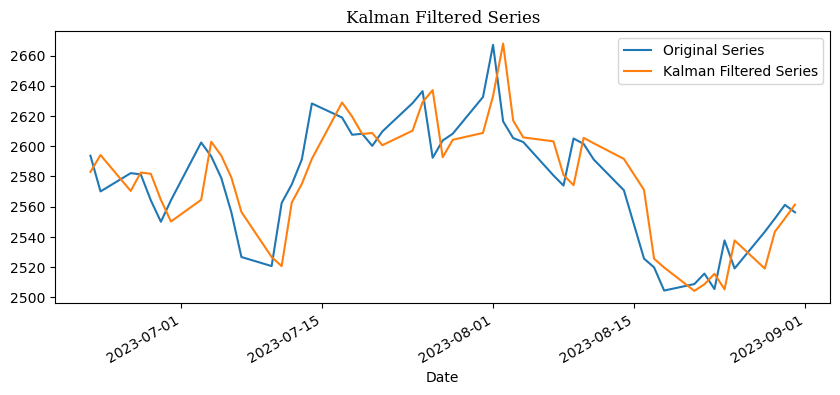

In [11]:
import pandas as pd

predict = result.get_prediction()
plotting = pd.DataFrame({"Original Series": kospi[-50:],
                         "Kalman Filtered Series": predict.predicted_mean[-50:]})
plotting.plot(figsize = (10, 4))
plt.title("Kalman Filtered Series", fontfamily = 'Serif', fontsize = 12)
plt.grid(False)

$\mathrm{ARIMA(1,0,2)}$모형과 Kalman Filtered Series를 비교해 보도록 한다

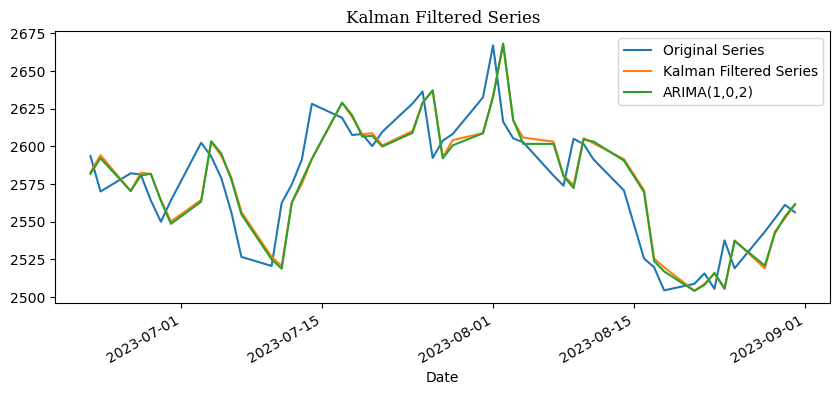

In [12]:
predict = result.get_prediction()
plotting = pd.DataFrame({"Original Series": kospi[-50:],
                         "Kalman Filtered Series": predict.predicted_mean[-50:],
                         "ARIMA(1,0,2)" : model.fittedvalues[-50:]})
plotting.plot(figsize = (10, 4))
plt.title("Kalman Filtered Series", fontfamily = 'Serif', fontsize = 12)
plt.grid(False)

$\mathrm{ARIMA(1,0,2)}$ 모형과 Kalman filtered series가 그다지 차이가 없다는 것을 알 수 있다. 즉, $\mathrm{ARIMA}$모형은 State Space model의 일종이라 볼 수 있다

#### Exercise 1

2018년 01월 01일부터 2023년 9월 25일까지의 Apple 주가를 import하라. 적절한 paramter를 찾아 $\mathrm{ARMA}$모형을 추정하라. 추정한 모형과 Kalman Filtering된 모형을 비교하라. $\mathrm{ARMA}$모형과 kalman filtering 모형은 비슷한 양상을 띄는가?

In [13]:
# write your code here!

#### 3. Kalman Smoothing

Kalman Filtering이 현재 시간 단계에서의 상태 예측값을 계산하고 이를 업데이트한다. 예측은 이전 시간 단계의 상태 추정치와 관측값을 기반으로 하며, 이를 통해 현재 시간 단계의 상태를 예측하는데, 그에 반해 Kalman Smoothing은 현재 시간 단계에서의 상태 예측과 과거 상태의 예측값을 포함해 추정함으로써 평활화를 한다

결과적으로, Kalman Smoothing을 통해 추정한 값이 Filtering에 비해 좀더 평활화가 크다

**Backward Propagation**

초기의 관측된 데이터 $X_0$가 있다고 가정하자. 단, 아래의 과정은 전부 t기에서 가용가능한 정보의 집합 $F_{t-1}$가 관측데이터 $X_t$에 주어져 있다고 가정한다

Kalman Filter의 과정이 t기에서 t+1기의 상태를 추정하여 관측값의 사후 분포를 추정하는 과정이라면, smoothing은 미래의 값을 과거에 적용하여 관측된 값을 보정하는 backpropagation 과정이다

$$\begin{pmatrix} X_0 \\ X_1 \end{pmatrix} \sim N\Big( 
\begin{bmatrix} X_{0|0} \\ X_{1|0} \end{bmatrix},
\begin{bmatrix} P_{0|0} & P_{0|0} A_1^\prime \\ A_1 P_{0|0} & P_{1|0} \end{bmatrix}
\Big)$$

$J_0 = P_{0|0} A_{1}^\prime P_{1|0}^{-1}$ (일반화한다면 $J_t = P_{t|t} A_{t+1}^\prime P_{t+1|t}^{-1}$)으로 가정하자. 그러면, 1기에 대해 0기의 분포를 다음과 같이 추정할 수 있다

$$\mathbb{E}[X_0|X_1] = X_{0|0} + J_0(X_1 - X_{1|0})$$
$$\mathrm{Var}[X_0|X_1] = P_{0|0} - P_{0|0}A_1^\prime P_{1|0}^{-1}A_1P_{0|0}$$

즉,

$$\mathbb{E}(X_0) = X_{0|0} + P_{0|0} A_1^\prime P_{1|0}^{-1}(S_{1|T} - S_{1|0})$$

이다. 여기서 $T$는 관측가능한 데이터의 전 구간을 의미한다

#### example 3

Kalman filtering을 통해 2020년 1월 1일부터 2023년 8월 31일까지의 Kalman smoothing을 진행해 본다. 잔차를 계산하라. 잔차는 여전히 정규분포 모양을 띄고 있는가?

In [14]:
from statsmodels.tsa.statespace.mlemodel import MLEModel

아래 함수는 kalman smoothering을 수행하는 함수이다. 각 parameter는 다음과 같은 역할을 한다

- q: 시스템 오차의 분산을 조절하는 매개변수이다. 이 값이 작을수록 곡선이 매끄럽게 추정된다
- dt: 시간 간격을 나타낸다
- s: 측정 오차의 표준 편차. 즉 노이즈를 의미한다. 이 값이 클수록 측정값이 더 불안정해진다

- A: 상태 전이 행렬이다. 현재 상태에서 다음 상태로 어떻게 이동하는지를 나타낸다
- Q: 시스템 오차의 공분산 행렬이다. 시스템 오차의 분산을 나타내며, 크기가 클수록 모델은 더 불안정해진다.
- H: 측정 행렬, 상태를 어떻게 측정하는지를 나타낸다
- R: 측정 오차의 공분산 행렬, 이 행렬은 측정 오차의 분산을 나타낸다

**초기 추정치**

- m0: 초기 상태의 추정치, 이 값은 상태의 초기 추정값을 나타낸다
- P0: 초기 상태의 공분산 행렬, 이 행렬은 초기 상태의 불확실성을 나타낸다

In [15]:
def kalman_smoothing(close : pd.Series, 
                     q : float, dt : float = 1.0, s : float = 0.5,
                     A : np.array = np.array([[1]]), 
                     Q : np.array = np.array([[1]]), 
                     H : np.array = np.array([[1]]), 
                     R : np.array = np.eye(1),
                     m0 : np.array = np.array([[1]]),
                     P0 : np.array = np.eye(1),
                     k_state : int = 1) -> pd.DataFrame :
    Q = q * Q
    R = s ** 2 * R

    kf = MLEModel(close, k_states = k_state)
    kf._state_names = ['x1']
    kf['design'] = H
    kf['obs_cov'] = R
    kf['transition'] = A
    kf['selection'] = np.eye(1)
    kf['state_cov'] = Q

    kf.initialize_known(A @ m0[:, 0], A @ P0 @ A.T + Q)
    res = kf.smooth(params = [])
    output = pd.DataFrame(res.states.smoothed.x1.values, index = close.index, columns = ['smoothered'])
    
    return output

q=0.001을 적용하여 평활화를 할 경우 다음과 같이 추정된다

Text(0.5, 1.0, 'Kalman Smoothering')

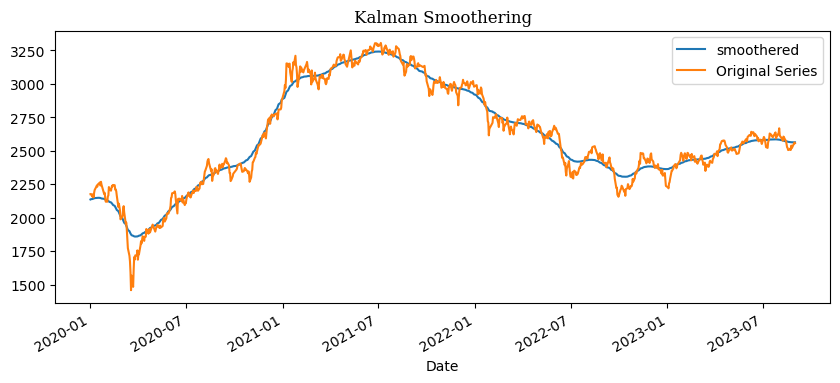

In [16]:
kalman_smoothed = kalman_smoothing(kospi, q = 0.001)
kalman_smoothed.plot(grid = False, figsize = (10, 4))
kospi.plot(grid = False, label = 'Original Series')
plt.legend()
plt.title('Kalman Smoothering', fontsize = 12, fontfamily = 'Serif')

오차를 계산해 본다. 여기서, 잔차에 추세가 확인되면 oversmoothing 되었다고 한다

Text(0.5, 1.0, 'Residual of Kalman smoothered models')

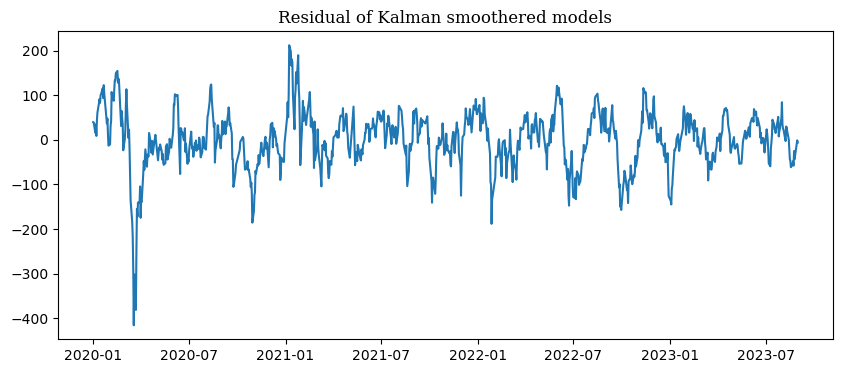

In [17]:
residual = pd.DataFrame(kospi).values - kalman_smoothed.values
residual = pd.DataFrame(residual, index = kospi.index)

plt.figure(figsize = (10, 4))
plt.plot(residual)
plt.grid(False)
plt.title('Residual of Kalman smoothered models', fontsize = 12, fontfamily = 'Serif')

Text(0.5, 1.0, 'Distribution of Residual')

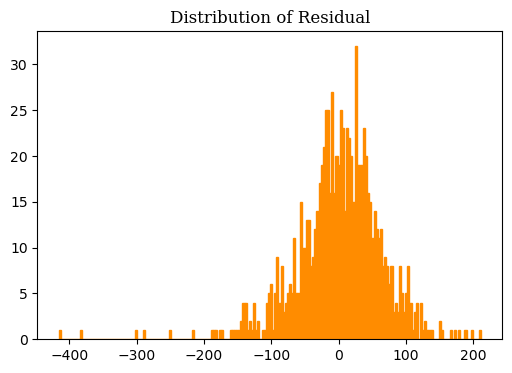

In [18]:
plt.figure(figsize = (6, 4))
plt.hist(residual, bins = 200, edgecolor = 'darkorange', color = 'darkorange')
plt.grid(False)
plt.title('Distribution of Residual', fontsize = 12, fontfamily = 'Serif')

$\mathrm{ARMA}$모형과 마찬가지로 잔차는 통계적인 특성을 띈다

#### Exercise 2

example 3의 kalman smoother 함수를 사용하여 Exercise 1에서 이용한 Apple 주가 데이터를 이용해 q = 0.001에서의 kalman smoothing을 시행하라. 평활화된 가격 계열과 원 시계열 데이터의 오차를 계산하라. 오차는 어떠한 통계적 특성을 띄는가? 

In [19]:
# write your code here!